In [8]:
#our imports
import matplotlib
import pyart
from copy import deepcopy
import netCDF4
from matplotlib import pyplot as plt
import numpy as np
from __future__ import print_function
#import skfuzzy as fuzz
from scipy import ndimage
%matplotlib inline

In [9]:
filename = '/data/sample_sapr_data/235545.mdv'
#'/data/sample_sapr_data/nsaxsapr/BRW111010043552.RAWYL7Y'
radar = pyart.io.read(filename)

In [10]:
print(radar.scan_type)
print(radar.fields.keys())
print(radar.instrument_parameters['nyquist_velocity'])

ppi
['differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'spectrum_width', 'reflectivity', 'differential_reflectivity', 'specific_differential_phase', 'velocity']
{'units': 'meters_per_second', 'meta_group': 'instrument_parameters', 'data': array([ 16.52599907,  16.52599907,  16.52599907, ...,  16.52599907,
        16.52599907,  16.52599907], dtype=float32), 'comments': 'Unambiguous velocity', 'long_name': 'Nyquist velocity'}


In [5]:
filename = '/data/sample_sapr_data/nsaxsapr/raw/BRW131207040001.RAWWFAP'
#'/data/sample_sapr_data/nsaxsapr/BRW111010043552.RAWYL7Y'
radar = pyart.io.read(filename)
print("Here is the metadata")
print(radar.metadata.keys())
print("Here is a bunch of data from the radar")
print(radar.fields.keys())
print("And here are the names and units of each variable")
for idd in radar.fields.keys():
    print(radar.fields[idd]['standard_name'] + ": " + radar.fields[idd]['units']) 


Here is the metadata
['comment', 'sigmet_task_name', 'title', 'sigmet_extended_header', 'Conventions', 'source', 'version', 'references', 'time_ordered', 'instrument_name', 'rays_missing', 'original_container', 'institution', 'history']
Here is a bunch of data from the radar
['differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'spectrum_width', 'total_power', 'reflectivity', 'differential_reflectivity', 'specific_differential_phase', 'velocity']
And here are the names and units of each variable
differential_phase_hv: degrees
cross_correlation_ratio_hv: ratio
normalized_coherent_power: ratio
doppler_spectrum_width: meters_per_second
equivalent_reflectivity_factor: dBZ
equivalent_reflectivity_factor: dBZ
log_differential_reflectivity_hv: dB
specific_differential_phase_hv: degrees/km
radial_velocity_of_scatterers_away_from_instrument: meters_per_second


ppi


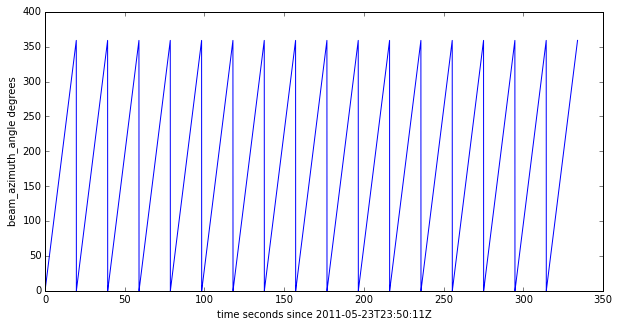

In [7]:
print(radar.scan_type)
fig = plt.figure(figsize = [10,5])
plt.plot(radar.time['data'], radar.azimuth['data'])
plt.xlabel(radar.time['standard_name'] + ' ' + radar.time['units'])
plt.ylabel(radar.azimuth['standard_name'] + ' ' + radar.azimuth['units'])


In [36]:
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar)
radar.add_field('SNR', snr, replace_existing = True)
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_below('SNR', 5)
gatefilter.exclude_invalid('velocity')
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, gatefilter = gatefilter)
radar.add_field('corrected_velocity', corr_vel, True)


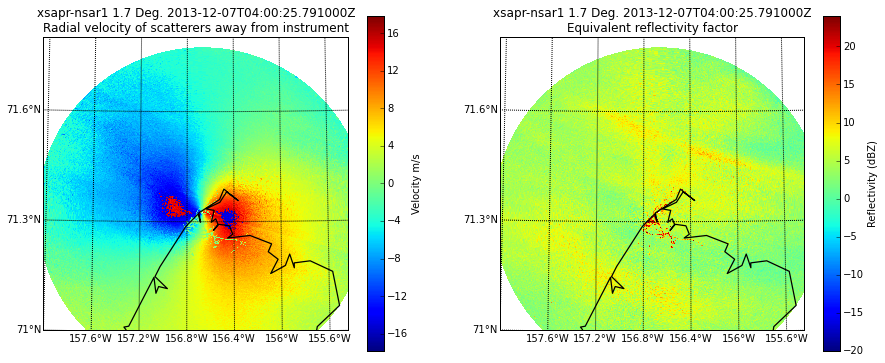

In [54]:
min_lon=-158.0
max_lon=-155.4
min_lat=71.0
max_lat=71.8
lon_lines=np.arange(min_lon, max_lon, 0.4)
lat_lines=np.arange(min_lat, max_lat, 0.3)

#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar)
#create a Matplotlib figure
f = plt.figure(figsize = [15,6])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
plt.subplot(1,2,1)
display.plot_ppi_map('velocity', sweep = 3, vmin = -17.81999969, vmax = 17.81999969,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'i', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='Velocity m/s')

plt.subplot(1,2,2)
display.plot_ppi_map('reflectivity', sweep = 3, vmin = -20, vmax = 24,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'i', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='Reflectivity (dBZ)')



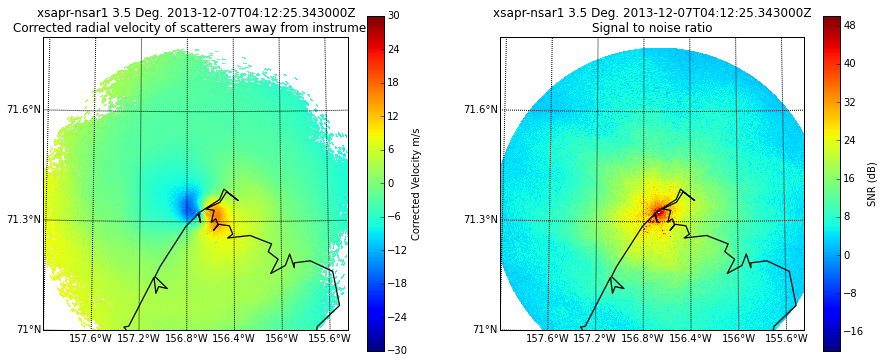

In [39]:
min_lon=-158.0
max_lon=-155.4
min_lat=71.0
max_lat=71.8
lon_lines=np.arange(min_lon, max_lon, 0.4)
lat_lines=np.arange(min_lat, max_lat, 0.3)

#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar)
#create a Matplotlib figure
f = plt.figure(figsize = [15,6])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
plt.subplot(1,2,1)
display.plot_ppi_map('corrected_velocity', sweep = 5, vmin = -30., vmax = 30,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'i', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='Corrected Velocity m/s')

plt.subplot(1,2,2)
display.plot_ppi_map('SNR', sweep = 5, vmin = -20, vmax = 50,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'i', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='SNR (dB)')

